In [2]:
import pandas as pd
from pandasql import sqldf

In [24]:
import pandas as pd
from pandasql import sqldf

# --- CONFIGURAZIONE ---
input_file = "results_code.xlsx"
output_file = "aggregated_results.xlsx"

# Definiamo la funzione per le query SQL
pysqldf = lambda q: sqldf(q, globals())

# --- ELABORAZIONE ---
try:
    # Usiamo pd.ExcelFile per gestire il file in modo efficiente e ottenere i nomi dei fogli
    xls = pd.ExcelFile(input_file)
    sheet_names = xls.sheet_names
    print(f"Fogli trovati nel file: {sheet_names}\n")

    # Lista per conservare i risultati di ogni foglio
    all_results = []

    # Ciclo su ogni nome di foglio (ogni modello)
    for sheet_name in sheet_names:
        print(f"--- Elaboro il foglio: '{sheet_name}' ---")

        # 1. Carica i dati del foglio corrente in un DataFrame
        df = pd.read_excel(xls, sheet_name=sheet_name)

        # 2. Seleziona solo le prime 4 colonne, come nel tuo codice
        # Assumiamo che siano sempre: problem, diagram, level, success
        df = df.iloc[:, :4].copy()
        # Per sicurezza, assegniamo i nomi corretti alle colonne
        df.columns = ['problem', 'diagram', 'level', 'success']
        
        # NOTA: Se nelle tue colonne 'input', 'output', ecc. hai numeri molto grandi,
        # potresti dover riconvertire le colonne in stringa qui per evitare l'OverflowError
        # Esempio: df['input'] = df['input'].astype(str)

        # 3. Definisci la query SQL che vuoi eseguire
        # Questa query calcola il tasso di successo raggruppando per problema, diagramma e livello
        query = """
        SELECT
            problem,
            diagram,
            level,
            COUNT(*) AS total_tests,
            SUM(success) AS successful_tests,
            (CAST(SUM(success) AS REAL) * 100 / COUNT(*)) AS success_rate_percent
        FROM
            df
        GROUP BY
            problem, diagram, level
        ORDER BY
            problem, diagram, level;
        """

        # 4. Esegui la query sul DataFrame del foglio corrente
        result_df = pysqldf(query)
        
        # 5. Aggiungi la colonna con il nome del modello (il nome del foglio) all'inizio
        result_df.insert(0, 'model_name', sheet_name)
        
        # 6. Aggiungi il DataFrame risultante alla nostra lista
        all_results.append(result_df)
        
        print(f"Elaborazione completata per '{sheet_name}'. Trovate {len(result_df)} righe di risultati.\n")

    # --- AGGREGAZIONE E SALVATAGGIO ---
    if all_results:
        # 7. Concatena tutti i DataFrame nella lista in un unico DataFrame finale
        final_df = pd.concat(all_results, ignore_index=True)

        # 8. Salva il DataFrame finale in un nuovo file Excel
        final_df.to_excel(output_file, index=False)

        csv_output_file = output_file.replace(".xlsx", ".csv")
        final_df.to_csv(csv_output_file, index=False)
        
        print(f"✅ Fatto! I risultati aggregati sono stati salvati in '{output_file}'")
        print("\n--- Anteprima dei risultati finali ---")
        print(final_df.head())
    else:
        print("❌ Nessun risultato da aggregare. Il file di output non è stato creato.")

except FileNotFoundError:
    print(f"ERRORE: Il file di input '{input_file}' non è stato trovato.")
except Exception as e:
    print(f"Si è verificato un errore imprevisto: {e}")

Fogli trovati nel file: ['Perception LM 1B 8bit', 'GPT5 Nano', 'LFM2 VL 450M', 'LFM2 VL 1.6B', 'Gemma 3 4B 4bit', 'Paligemma2 3B Mix', 'MiniCPM V 4.0', 'Gemma 3 4B', 'LLaVA 1.5 7B 4bit']

--- Elaboro il foglio: 'Perception LM 1B 8bit' ---
Elaborazione completata per 'Perception LM 1B 8bit'. Trovate 70 righe di risultati.

--- Elaboro il foglio: 'GPT5 Nano' ---
Elaborazione completata per 'GPT5 Nano'. Trovate 70 righe di risultati.

--- Elaboro il foglio: 'LFM2 VL 450M' ---
Elaborazione completata per 'LFM2 VL 450M'. Trovate 65 righe di risultati.

--- Elaboro il foglio: 'LFM2 VL 1.6B' ---
Elaborazione completata per 'LFM2 VL 1.6B'. Trovate 43 righe di risultati.

--- Elaboro il foglio: 'Gemma 3 4B 4bit' ---
Elaborazione completata per 'Gemma 3 4B 4bit'. Trovate 65 righe di risultati.

--- Elaboro il foglio: 'Paligemma2 3B Mix' ---
Elaborazione completata per 'Paligemma2 3B Mix'. Trovate 70 righe di risultati.

--- Elaboro il foglio: 'MiniCPM V 4.0' ---
Elaborazione completata per 'Mini

In [19]:
df = pd.read_excel("results_code_reasoning.xlsx", sheet_name = "LFM2 VL 450M")
df = df.iloc[:, :4].copy()

pysqldf = lambda q: sqldf(q, globals())

# Esempio di query: Calcoliamo il tasso di successo per ogni problema.
# Usiamo il nome della variabile 'df' come se fosse una tabella SQL.
query = """
SELECT
    problem,
    diagram,
    level,
    COUNT(*) AS total_tests,
    SUM(success) AS successful_tests,
    (CAST(SUM(success) AS REAL) * 100 / COUNT(*)) AS success_rate_percent
FROM
    df
WHERE
    problem = 'p084'
GROUP BY
    problem, diagram, level
ORDER BY
    diagram DESC;
"""

print(pysqldf(query))


  problem diagram  level  total_tests  successful_tests  success_rate_percent
0    p084      fc      1         2010              1007             50.099502
1    p084      fc      2         2010                 0              0.000000
2    p084      fc      3         2010                 0              0.000000
3    p084    bpmn      1         2010                 2              0.099502
4    p084    bpmn      2         2010                 0              0.000000
5    p084    bpmn      3         2010                 0              0.000000
6    p084   block      1         1007              1005             99.801390


File 'dati.csv' non trovato. Uso dati di esempio.


/tmp/ipykernel_263097/58713522.py:28: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(


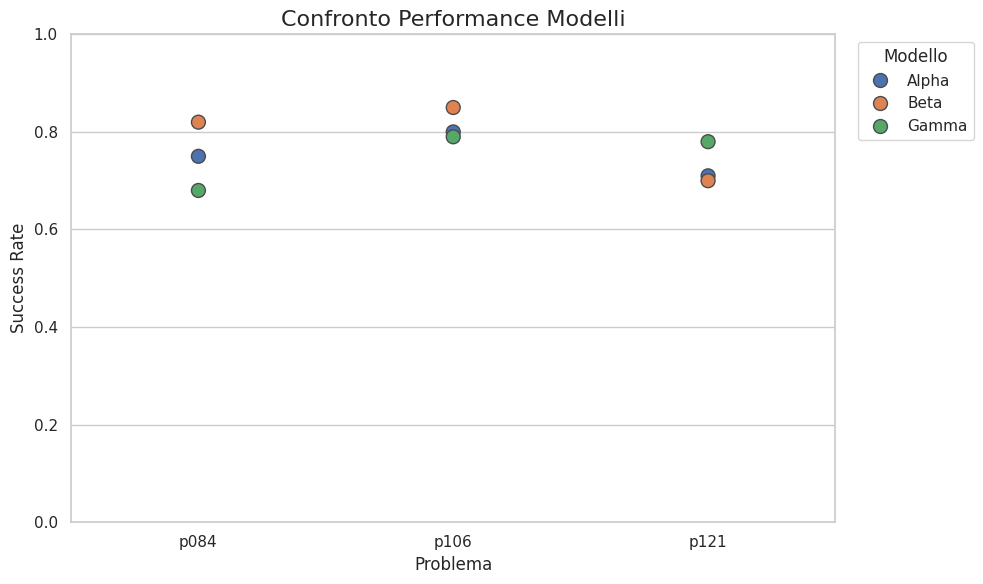

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carica i dati dal tuo file CSV
# Assicurati che il file 'dati.csv' sia nella stessa cartella dello script.
try:
    df = pd.read_csv('dati.csv')
except FileNotFoundError:
    print("File 'dati.csv' non trovato. Uso dati di esempio.")
    # Creiamo un DataFrame di esempio se il file non c'è
    data = {
        'Problema': ['p084', 'p084', 'p084', 'p106', 'p106', 'p106', 'p121', 'p121', 'p121'],
        'Modello': ['Alpha', 'Beta', 'Gamma', 'Alpha', 'Beta', 'Gamma', 'Alpha', 'Beta', 'Gamma'],
        'SuccessRate': [0.75, 0.82, 0.68, 0.80, 0.85, 0.79, 0.71, 0.70, 0.78]
    }
    df = pd.DataFrame(data)

# 2. Imposta lo stile del grafico (opzionale, ma rende tutto più bello)
sns.set_theme(style="whitegrid")

# 3. Crea la figura su cui disegnare il grafico
plt.figure(figsize=(10, 6)) # Imposta le dimensioni del grafico

# 4. Crea il dot plot con una sola riga di codice!
# Usiamo `stripplot`, che è perfetto per questo.
# `jitter=False` assicura che i punti siano allineati verticalmente.
ax = sns.stripplot(
    data=df,
    x="Problema",
    y="SuccessRate",
    hue="Modello",
    jitter=False,  # Mantiene i punti sulla stessa linea verticale
    size=10,       # Li ho fatti un po' più grandi per visibilità
    linewidth=1,
    edgecolor='gray'
    # HO RIMOSSO 'dodge=True'
)

# 5. Aggiungi etichette e titolo per chiarezza
plt.title('Confronto Performance Modelli', fontsize=16)
plt.xlabel('Problema', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.ylim(0, 1) # Imposta l'asse Y da 0 a 1 (tipico per i tassi di successo)

# Migliora la legenda
plt.legend(title='Modello', bbox_to_anchor=(1.02, 1), loc='upper left')

# 6. Salva il grafico come file immagine e mostralo
plt.tight_layout() # Aggiusta automaticamente gli spazi
plt.savefig('mio_dot_plot.png', dpi=300) # Salva come file PNG ad alta risoluzione
plt.show()